<a href="https://colab.research.google.com/github/hyeonn-06/data_analysis/blob/main/ch05_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import gdown
gdown.download("http://bit.ly/3pK7iuu", "ns_book7.csv", quiet=False)

Downloading...
From: http://bit.ly/3pK7iuu
To: /content/ns_book7.csv
100%|██████████| 53.8M/53.8M [00:00<00:00, 186MB/s]


'ns_book7.csv'

In [29]:
import pandas as pd
ns_book7 = pd.read_csv("ns_book7.csv", low_memory=False)
ns_book7.head()

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
0,1,인공지능과 흙,김동훈 지음,민음사,2021,9788937444319,NaN,NaN,NaN,NaN,1,0,2021-03-19
1,2,가짜 행복 권하는 사회,김태형 지음,갈매나무,2021,9791190123969,NaN,NaN,NaN,NaN,1,0,2021-03-19
2,3,나도 한 문장 잘 쓰면 바랄 게 없겠네,김선영 지음,블랙피쉬,2021,9788968332982,NaN,NaN,NaN,NaN,1,0,2021-03-19
3,4,예루살렘 해변,"이도 게펜 지음, 임재희 옮김",문학세계사,2021,9788970759906,NaN,NaN,NaN,NaN,1,0,2021-03-19
4,5,김성곤의 중국한시기행 : 장강·황하 편,김성곤 지음,김영사,2021,9788934990833,NaN,NaN,NaN,NaN,1,0,2021-03-19


In [30]:
count_by_year = ns_book7['발행년도'].value_counts()
count_by_year

,count
발행년도,
2012,18601
2014,17797
2009,17611
2011,17523
2010,17503
...,...
2548,1
1948,1
1967,1


In [31]:
count_by_year = count_by_year.sort_index()
count_by_year

,count
발행년도,
1947,1
1948,1
1949,1
1952,11
1954,1
...,...
2551,1
2552,2
2559,1


In [33]:
import datetime
yy = datetime.datetime.now().year

count_by_year = count_by_year[count_by_year.index <=  yy]
count_by_year

,count
발행년도,
1947,1
1948,1
1949,1
1952,11
1954,1
...,...
2018,16423
2019,15220
2020,11834


In [35]:
import numpy as np
# 주제분류번호의 1번째 숫자만 선택 (1번째 숫자가 대분류 숫자)
# 0 : 종류 / 1 : 철학 / 2 : 종교 / 3 : 사회과학 / 4 : 자연과학/ 5 : 기술과학 / 6 : 예술 / 7 : 언어 / 8 : 문학 / 9 : 역사
def kdc_1st_char(no):
  if no is np.nan:
    return "-1"
  else:
    return no[0]

count_by_subject = ns_book7['주제분류번호'].apply(kdc_1st_char).value_counts()
count_by_subject

,count
주제분류번호,
8,108643
3,80767
5,40916
9,26375
6,25070
1,22647
-1,16978
7,15836
4,13688


In [37]:
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 100

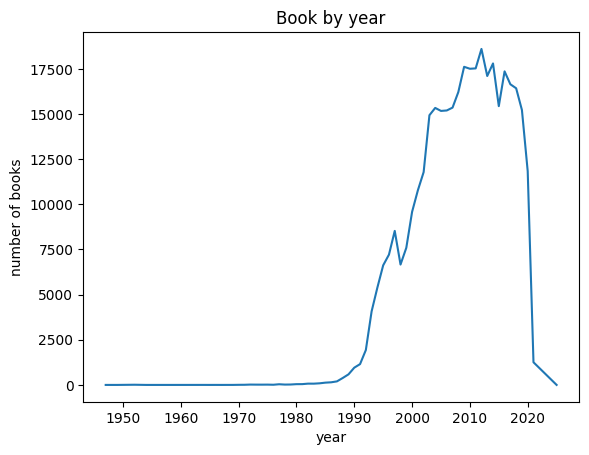

In [38]:
plt.plot(count_by_year.index, count_by_year.values)
plt.title('Book by year')
plt.xlabel('year')
plt.ylabel('number of books')
plt.show()

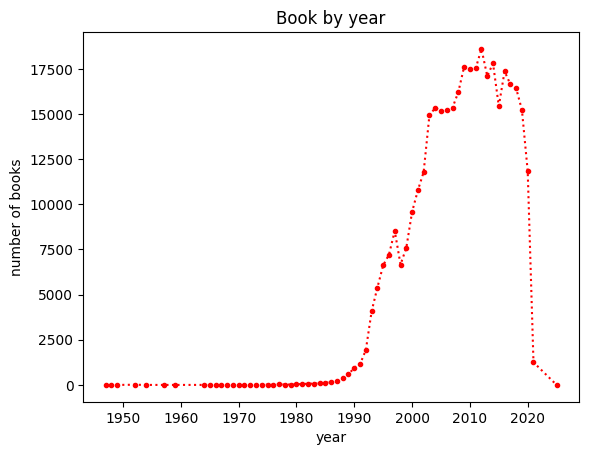

In [44]:
# linestyle 종류
# 실선 : '-' / 점선 : ':' / 쇄선 : '-.' / 파선 '--'
# plt.plot(count_by_year, marker='.', linestyle=':', color='red')
plt.plot(count_by_year, '.:r')
plt.title('Book by year')
plt.xlabel('year')
plt.ylabel('number of books')
plt.show()

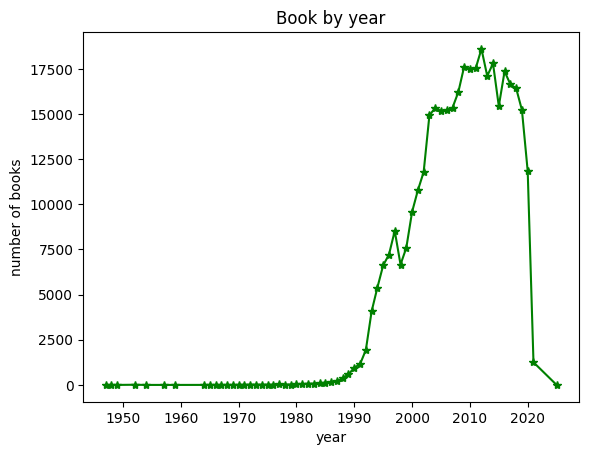

In [53]:
plt.plot(count_by_year,"*-g")
plt.title('Book by year')
plt.xlabel('year')
plt.ylabel('number of books')
plt.show()

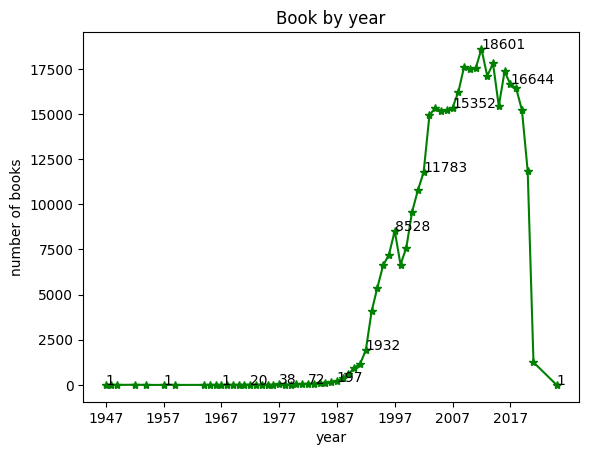

In [49]:
plt.plot(count_by_year,"*-g")
plt.title('Book by year')
plt.xlabel('year')
plt.ylabel('number of books')
plt.xticks(range(1947, yy, 10))
# [::?] -> ?씩 증가하며 데이터프레임의 시작부터 끝까지의 값을 선택
for idx, val in count_by_year[::5].items():
  # annotate(str, (x,y)) : 그래프의 (x,y)좌표에 str 출력
  plt.annotate(val, (idx, val))
plt.show()

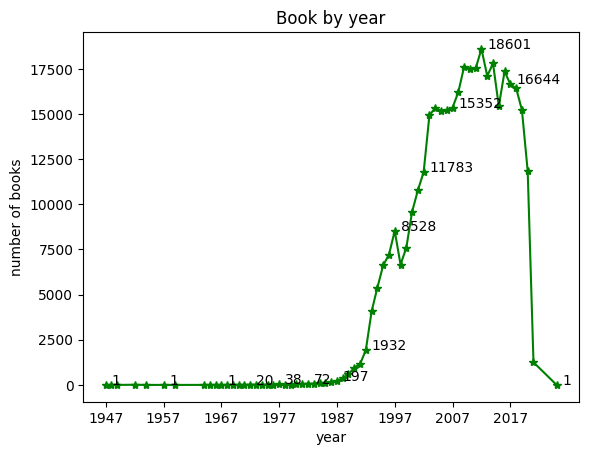

In [58]:
plt.plot(count_by_year,"*-g")
plt.title('Book by year')
plt.xlabel('year')
plt.ylabel('number of books')
plt.xticks(range(1947, yy, 10))
for idx, val in count_by_year[::5].items():
  # annotate(str, (x,y), xytext=(x+?,y+?)) : 그래프의 (x+?,y+?)좌표에 str 출력
  plt.annotate(val, (idx, val), xytext=(idx+1, val+10))
plt.show()

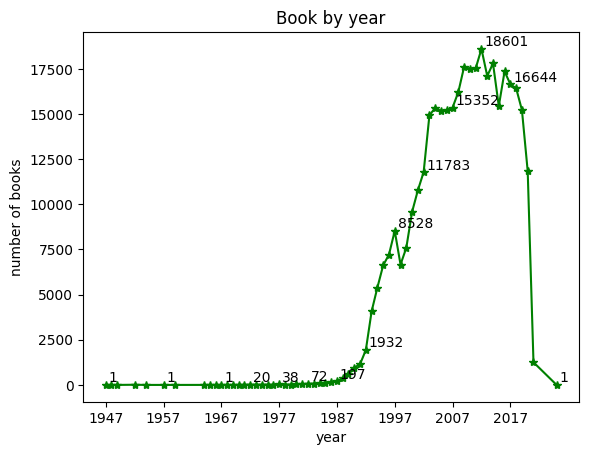

In [59]:
plt.plot(count_by_year,"*-g")
plt.title('Book by year')
plt.xlabel('year')
plt.ylabel('number of books')
plt.xticks(range(1947, yy, 10))
for idx, val in count_by_year[::5].items():
  # annotate(str, (x,y), xytext=(x1,y1), textcoords="offset points") : 그래프의 (x,y)좌표에서 x1포인트, y1포인트 떨어진 위치에 str 출력
  # 1포인트 당 1/72인치
  # 픽셀 단위 지정을 하기 위해서는 textcoords="offset pixels"
  plt.annotate(val, (idx, val), xytext=(2, 2), textcoords="offset points")
plt.show()

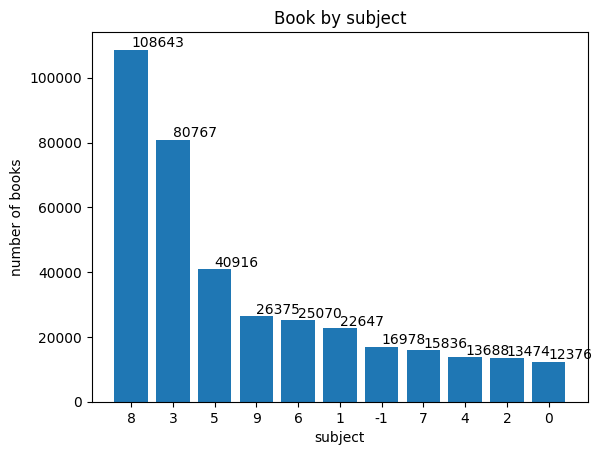

In [60]:
plt.bar(count_by_subject.index, count_by_subject.values)
plt.title('Books by subject')
plt.xlabel('subject')
plt.ylabel('number of books')
for idx, val in count_by_subject.items():
  plt.annotate(val, (idx, val), xytext=(0,2), textcoords="offset points")
plt.show()

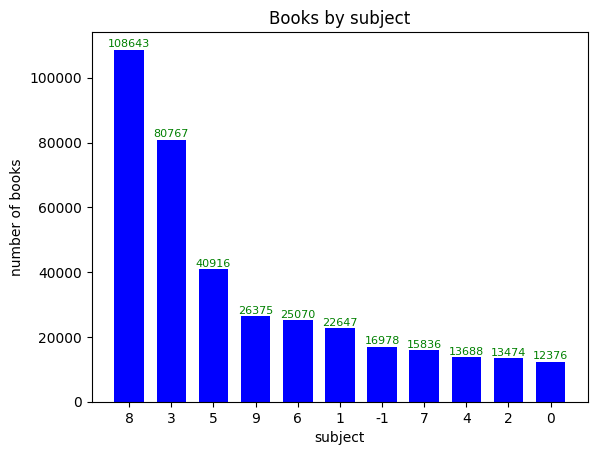

In [69]:
plt.bar(count_by_subject.index, count_by_subject.values, width=0.7, color="blue")
plt.title('Books by subject')
plt.xlabel('subject')
plt.ylabel('number of books')
for idx, val in count_by_subject.items():
  plt.annotate(val, (idx, val), xytext=(0,2), textcoords="offset points", fontsize=8, ha="center", color="green")
plt.show()

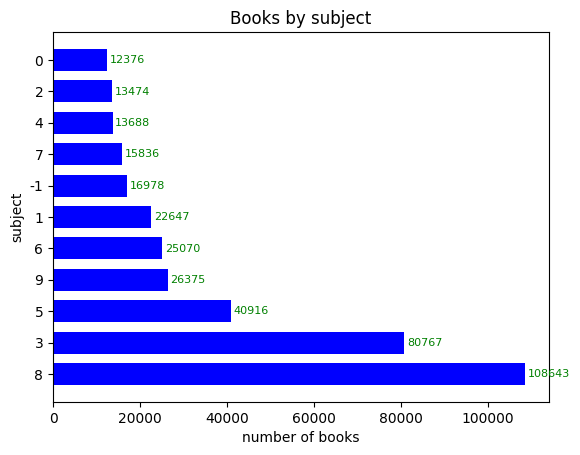

In [75]:
plt.barh(count_by_subject.index, count_by_subject.values, height=0.7, color="blue")
plt.title('Books by subject')
plt.xlabel('number of books')
plt.ylabel('subject')
for idx, val in count_by_subject.items():
  plt.annotate(val, (val, idx), xytext=(2,0), textcoords="offset points", fontsize=8, va="center", color="green")
plt.show()